In [66]:
import math
from pprint import pprint

In [ ]:
# downloading iris dataset
! curl -o ../data/iris.data https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [21]:
# dataset for loading dataset
def load_dataset(path):
    dataset = {
        "x" : [],
        "y" : []
    }
    with open(path) as file_in:
        for line in file_in:
            line = line.split(",")
            x = list(map(float, line[0:-1]))
            y = line[-1].rstrip('.\n')
            if y:
                dataset["x"].append(x)
                dataset["y"].append(y)
    return dataset

# Loading the dataset
iris = load_dataset("../data/iris.data")

In [22]:
pprint(iris)

{'x': [[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
# each column represents a feature
# [rows, n_features] -> [n_features, rows], for feasibility we can transpose the matrix
def transpose(matrix):
    transposed = []
    rows = len(matrix)
    cols = len(matrix[0])
    for icol in range(cols):
        feature = []
        for irow in range(rows):
            ifeature = matrix[irow][icol]
            feature.append(ifeature)
        transposed.append(feature)
    return transposed 

In [24]:
# transforming into row representation
iris["x_transpose"] = transpose(iris["x"])

assert len(iris["x_transpose"]) == len(iris["x"][0])
assert len(iris["x_transpose"][0]) == len(iris["x"])

In [25]:
print(iris.keys())

dict_keys(['x', 'y', 'x_transpose'])


In [26]:
def mean(rv):
    """
    Given a random variable, 
    return the mean of the random variable
    """
    return round(sum(rv) / len(rv), 2)

def median(rv):
    """
    Much more robust when we have outliers in our dataset.
    """
    sorted_rv = sorted(rv)
    length = len(sorted_rv)
    isEven = True if length % 2 == 0 else False
    if isEven:
        i, j = length // 2, (length // 2) - 1
        return mean([sorted_rv[i], sorted_rv[j]])
    else:
        return sorted_rv[length // 2]

for ifeature, feature in enumerate(iris["x_transpose"]):
    print(f"Mean of [f{ifeature + 1}]: {mean(feature)}")
    print(f"Median of [f{ifeature + 1}]: {median(feature)}")
    print()

Mean of [f1]: 5.84
Median of [f1]: 5.8

Mean of [f2]: 3.05
Median of [f2]: 3.0

Mean of [f3]: 3.76
Median of [f3]: 4.35

Mean of [f4]: 1.2
Median of [f4]: 1.3



In [27]:
def variance(rv, use_bessels_correction=False):
    """
    Given a sample drawn from a population, returns the variance (optionally corrected by Bessel's correction).
    """
    m = mean(rv)
    n = len(rv)
    
    if use_bessels_correction:
        var = sum(((ix - m) ** 2) / (n - 1) for ix in rv)
    else:
        var = sum(((ix - m) ** 2) / n for ix in rv)
    
    return var

def standard_deviation(rv, use_bessels_correction=False):
    """
    Assumes the sample is drawn from a population, hence denominator is (n - 1),
    popularly known as Bessel's correction.
    """
    var = variance(rv, use_bessels_correction)
    return round(var ** 0.5, 2)

for ifeature, feature in enumerate(iris["x_transpose"]):
    print(f"Standard deviation of [f{ifeature + 1}]: {standard_deviation(feature)}")

Standard deviation of [f1]: 0.83
Standard deviation of [f2]: 0.43
Standard deviation of [f3]: 1.76
Standard deviation of [f4]: 0.76


In [31]:
def covariance(x, y):
    """
    Given two random variable X and Y
    returns the linear relationship
    """
    mean_x, mean_y = mean(x), mean(y)
    return (1 / len(x)) * sum([(ix - mean_x) * (iy - mean_y) for ix, iy in zip(x, y)])

def pearson_correlation_coeff(x, y):
    """
    Computes the pearson correlation coefficient
    measure for two random variable
    """
    covar = covariance(x, y)
    return covar / (standard_deviation(x) * standard_deviation(y))

from scipy.stats import rankdata
def spearman_rank_correlation(x, y):
    """
    Computes spearman rank correlation coefficient
    """
    rank_x, rank_y = rankdata(x), rankdata(y)
    return pearson_correlation_coeff(rank_x, rank_y)



for ifeature1, f1 in enumerate(iris["x_transpose"]):
    for ifeature2, f2 in enumerate(iris["x_transpose"]):
        spearman_corr = spearman_rank_correlation(f1, f2)
        print(f"Spearman correlation f{ifeature1 + 1}-f{ifeature2 + 1}: {spearman_corr}")
    print()

Spearman correlation f1-f1: 1.0000404682143909
Spearman correlation f1-f2: -0.15947352547334984
Spearman correlation f1-f3: 0.881483738153585
Spearman correlation f1-f4: 0.8345079071882848

Spearman correlation f2-f1: -0.15947352547334984
Spearman correlation f2-f2: 1.0001728480795238
Spearman correlation f2-f3: -0.3034742418574342
Spearman correlation f2-f4: -0.27755846076593577

Spearman correlation f3-f1: 0.881483738153585
Spearman correlation f3-f2: -0.3034742418574342
Spearman correlation f3-f3: 1.0001804270105918
Spearman correlation f3-f4: 0.9361667314888081

Spearman correlation f4-f1: 0.8345079071882848
Spearman correlation f4-f2: -0.27755846076593577
Spearman correlation f4-f3: 0.9361667314888081
Spearman correlation f4-f4: 1.000168675520337



In [36]:
def quantile(rv, q = 0.25):
    sorted_rv = sorted(rv)
    length = len(sorted_rv) - 1
    
    index = length * q
    if index.is_integer():
        return sorted_rv[int(index)]
    else:
        low, high = math.floor(index), math.ceil(index)
        
        lower_value = sorted_rv[low]
        upper_value = sorted_rv[high]
        
        return round(lower_value + (index - low) * (upper_value - lower_value), 2)
    

for ifeature, feature in enumerate(iris["x_transpose"]):
    q1 = quantile(feature, 0.25)
    q2 = quantile(feature, 0.50)    
    q3 = quantile(feature, 0.75)    
    print(f"Quantiles: f{ifeature + 1} :{[q1, q2, q3]}")
    

Quantiles: f1 :[5.1, 5.8, 6.4]
Quantiles: f2 :[2.8, 3.0, 3.3]
Quantiles: f3 :[1.6, 4.35, 5.1]
Quantiles: f4 :[0.3, 1.3, 1.8]


In [62]:
def percentile(arr, p):
    sorted_arr = sorted(arr)
    length = len(sorted_arr)
    index = p * (length - 1)
    # Linear interpolation
    low, high = math.floor(index), math.ceil(index)
    low_val, high_val = sorted_arr[low], sorted_arr[high]
    val = low_val + (index - low) * (high_val - low_val)
    return round(val, 2)
            
        
for ifeature, feature in enumerate(iris["x_transpose"]):
    p1 = percentile(feature, 0.25)
    p2 = percentile(feature, 0.75)    
    p2 = percentile(feature, 0.95)    
    print(f"Percentiles for feature {ifeature + 1}: {[p1, p2]}")

Percentiles for feature 1: [5.1, 7.25]
Percentiles for feature 2: [2.8, 3.8]
Percentiles for feature 3: [1.6, 6.1]
Percentiles for feature 4: [0.3, 2.3]


### Proportional Sampling

Proportional sampling is a sampling technique where the size of each stratum sample is directly proportional to the population size of the entire population of strata. This means that each strata sample has the same sampling fraction. 

In [63]:
from numpy.random import uniform, normal

def proportional_sampling(arr, num_samples):
    total = sum(arr)
    normalized_arr = [a / total for a in arr]
    
    # computing prefix sum
    prefix_sum = [normalized_arr[0]]
    for num in normalized_arr[1:]:
        prefix_sum.append(prefix_sum[-1] + num)
        
    samples = []
    for i in uniform(size = num_samples):
        for index, value in enumerate(prefix_sum):
            if i < value:
                samples.append(arr[index])
                break
    return samples

In [64]:
population = uniform(0.1, 10000, 500).astype("int16")
sampled = proportional_sampling(population, 10)
print("Sampled using proportional sampling:", sampled)

Sampled using proportional sampling: [6618, 3635, 6401, 7269, 3152, 5749, 4827, 9568, 6856, 2570]


### Central Limit Theorem

In [67]:
import matplotlib.pyplot as plt
from random import choice, randint

def central_limit_theorem(population, sample_size, iterations):
    assert sample_size < len(population), "Sample size should be smaller than the population."
    sample_means = []
    for i in range(iterations):
        sampling_distribution = [choice(population) for sample in range(sample_size)]
        sample_means.append(mean(sampling_distribution))
    
    plt.hist(sample_means, bins = 15)
    plt.grid(True)
    plt.show();
    
    return sample_means

Feature 1


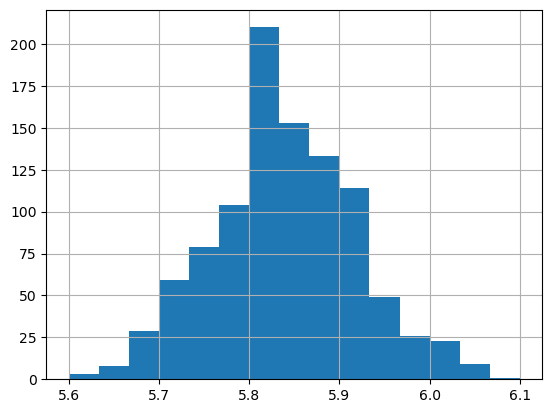

Feature 2


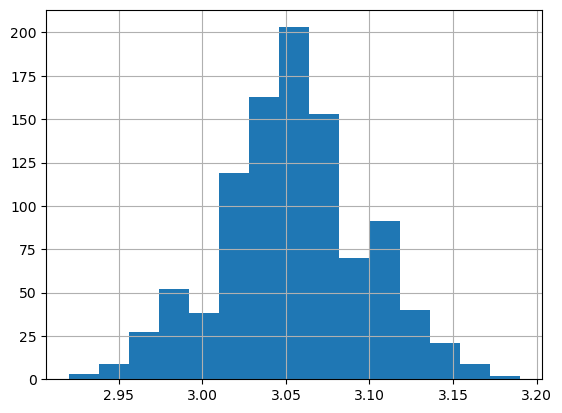

Feature 3


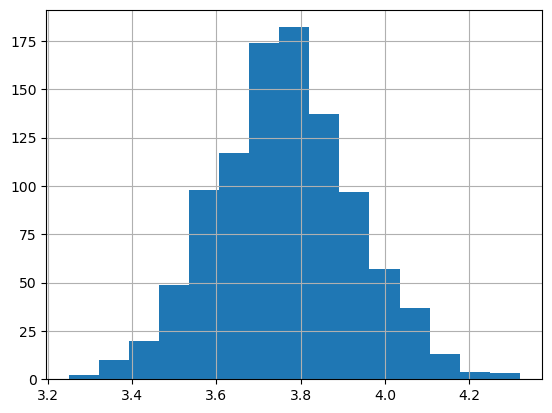

Feature 4


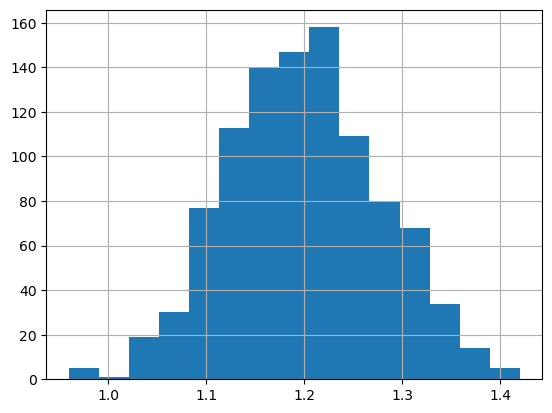

In [76]:
features_sample_means = []
for ifeature, feature in enumerate(iris["x_transpose"]):
    population = iris["x_transpose"][ifeature]
    print("Feature", ifeature + 1)
    sample_means = central_limit_theorem(population, sample_size = 100, iterations = 1000)
    features_sample_means.append(sample_means)

### Quantile-Quantile Plot

In [77]:
def get_percentiles(rv):
    length = len(rv) - 1
    sorted_rv = sorted(rv)
    percentiles = []
    for i in range(1, 101):
        index = i * length * 0.01
        if index.is_integer():
            percentiles.append(sorted_rv[int(index)])
        else:
            low, high = math.floor(index), math.ceil(index)
            low_val, high_val = sorted_rv[low], sorted_rv[high]
            perc_val = low_val + (index - low) * (high_val - low_val)
            percentiles.append(perc_val)
    return percentiles

In [78]:
# Q: Does CLT really work?
def QQplot(rv1, rv2):
    x_values = get_percentiles(rv1)
    y_values = get_percentiles(rv2)
    
    plt.scatter(x_values, y_values, color='blue', alpha=0.5, label='Data Points')
    plt.grid(True)
    plt.show();

Q-Q plot with normal distribution - Feature 1


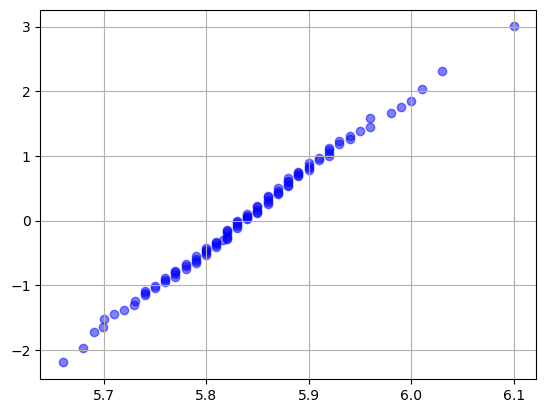

Q-Q plot with normal distribution - Feature 2


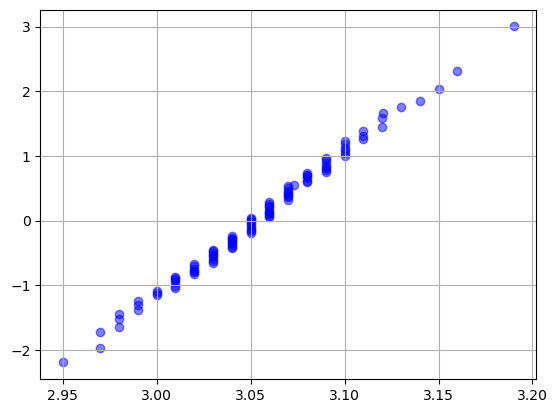

Q-Q plot with normal distribution - Feature 3


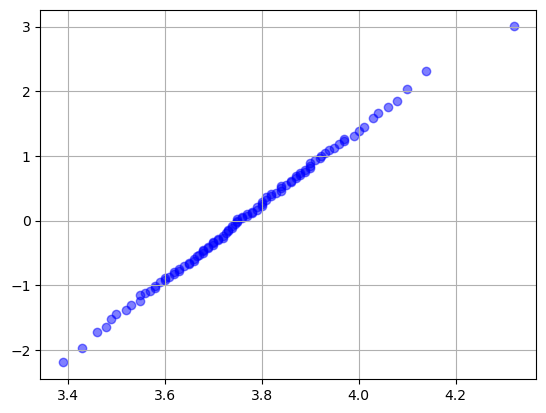

Q-Q plot with normal distribution - Feature 4


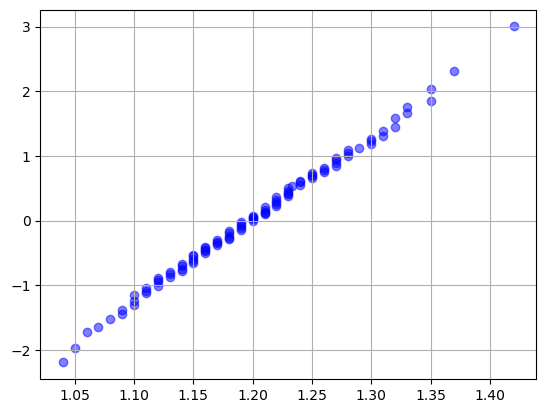

In [80]:
nd_samples = normal(0, 1, 1000)

for index, feature_means in enumerate(features_sample_means):
    print("Q-Q plot with normal distribution - Feature", index + 1)
    QQplot(feature_means, nd_samples)

This is roughly a line with 45 degree angle, so CLT definitely works!

### Confidence Intervals

In [81]:
from scipy.stats import norm, t

In [93]:
class ConfidenceInterval:
    """
    Given a sample distribution estimates the 
    mean of the population distribution. 
    """
    def __init__(self, C, population_std_dev = None):
        self.C = C
        self.alpha = 1 - C
        self.std_dev = population_std_dev
        
    def estimate_mean(self, samples):
        sample_size = len(samples)
        sample_mean = mean(samples)
        
        # If population standard deviation is given then CLT will be used
        if self.std_dev:
            print("Population standard deviation is given. Estimating mean...")
            margin_of_error = norm.ppf(1 - self.alpha/2)
        
        # In-case population standard deviation is not given
        # need to check if sample size if atleast 30
        elif not self.std_dev:
            self.std_dev = standard_deviation(samples)
            # Uses t-distribution for small samples
            if sample_size < 30:
                print("Population standard deviation is not provided, using sample standard deviation...")
                print("Sample size is small, using t-distribution...")
                degrees_of_freedom = sample_size - 1
                margin_of_error = t.ppf(1 - self.alpha/2, df=degrees_of_freedom)
            else:
                # Normal distribution works well for large samples
                print("Population standard deviation is not provided, using sample standard deviation..")
                print("Margin of error will be computed from normal distribution, sample size is large..")
                margin_of_error = norm.ppf(1 - self.alpha/2)
            
            
        # Computing the confidence interval
        around = (margin_of_error * (self.std_dev / (sample_size) ** 0.5))
        lower_bound = sample_mean - around
        upper_bound = sample_mean + around
        return {
            "confidence" : f"{self.C * 100}%",
            "lower_bound" : round(lower_bound, 2),
            "upper_bound" : round(upper_bound, 2)
        }
    
    def estimate_mean_using_bootstrapping(self, samples, bootstrapping_sample_size = 30, iteration = 1000):
        # Uses bootstrapping to estimate the mean
        parameter_of_sampling_distribution = []
        for i in range(iteration):
            new_sample = [choice(samples) for i in range(bootstrapping_sample_size)]
            new_sample_mean = mean(new_sample)
            parameter_of_sampling_distribution.append(new_sample_mean)
        
        # computing intervals
        low = math.floor((1 - self.C) // 2)
        high =  math.ceil(self.C + low)
        
        lower_bound = percentile(parameter_of_sampling_distribution, low)
        upper_bound = percentile(parameter_of_sampling_distribution, high)
        
        return {
            "confidence" : f"{self.C * 100}%",
            "lower_bound" : round(lower_bound, 2),
            "upper_bound" : round(upper_bound, 2)
        }

In [96]:
# Considering feature-1 only!
population = iris["x_transpose"][0]
population_std_dev = standard_deviation(population)

print("Population mean:", mean(population))
print("Population std-dev", population_std_dev)

Population mean: 5.84
Population std-dev 0.83


In [97]:
# CASE - 1
# sampling 100 points from population
samples = [choice(population) for i in range(100)]

# we want to estimate the population mean using the samples
# standard deviation is provided
ci = ConfidenceInterval(C = 0.95, population_std_dev = population_std_dev)
estimation_dict = ci.estimate_mean(samples, )

print(estimation_dict)

Population standard deviation is given. Estimating mean...
{'confidence': '95.0%', 'lower_bound': 5.8, 'upper_bound': 6.12}


In [98]:
# CASE - 2
# sampling 20 points only! Population mean is not given
samples = [choice(population) for i in range(20)]

# we want to estimate the population mean using the samples
# Population standard deviation will not be provided
ci = ConfidenceInterval(C = 0.95)
estimation_dict = ci.estimate_mean(samples)

print(estimation_dict)

Population standard deviation is not provided, using sample standard deviation...
Sample size is small, using t-distribution...
{'confidence': '95.0%', 'lower_bound': 5.37, 'upper_bound': 6.25}


In [99]:
# CASE - 3
# Empirical bootstrapping based method
samples = [choice(population) for i in range(100)]

# confidence intervals using bootstrappin
ci = ConfidenceInterval(C = 0.95)
estimation_dict = ci.estimate_mean_using_bootstrapping(samples, 
                                                    bootstrapping_sample_size = 35, 
                                                    iteration = 10000)

print(estimation_dict)

{'confidence': '95.0%', 'lower_bound': 5.34, 'upper_bound': 6.35}
